In [49]:
import numpy as np
from iv_data_generator import ImpliedVolatilityDataGenerator
import matplotlib.pyplot as plt
import matplotlib as mpl

from matplotlib import cm
from helper import iv_grids_to_call_grids


from mpl_toolkits.mplot3d import Axes3D

In [3]:
strikes = np.arange(0.7, 1.5, 0.05)
ttms = np.arange(30, 390, 30)
#ttms = np.arange(10, 12, 1)

print(strikes.shape, ttms.shape)
Generator = ImpliedVolatilityDataGenerator(strikes, ttms)
print(strikes)
print(ttms)

(16,) (12,)
[0.7  0.75 0.8  0.85 0.9  0.95 1.   1.05 1.1  1.15 1.2  1.25 1.3  1.35
 1.4  1.45]
[ 30  60  90 120 150 180 210 240 270 300 330 360]


In [6]:
num_data_points = 2000
data = Generator.generate_with_moving_params(num_data_points)

<Figure size 1152x1152 with 0 Axes>

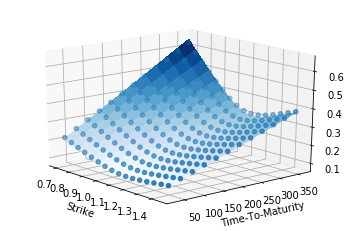

In [52]:
plt.figure(figsize=(16,16))
X, Y = np.meshgrid(strikes, ttms)
Z = data[1500,:].reshape([ttms.size, strikes.size])
Z2 = data[1520,:].reshape([ttms.size, strikes.size])
fig ,ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.view_init(20, -40)
ax.set_xlabel('Strike')
ax.set_ylabel('Time-To-Maturity')
ax.set_zlabel('Implied Volatility')
ax.plot_surface(X, Y, Z, linewidth=0, antialiased=False, cmap="Blues")
ax.scatter(X, Y, Z2, c='tab:blue')
mpl.lines.Line2D([0],[0], linestyle="none", c='tab:orange', marker = '_')
plt.savefig("Cover_Image.pdf")


<Figure size 432x288 with 0 Axes>

In [14]:
print(strikes.size)
print(ttms.size)

data.shape

16
12


(10000, 192)

In [6]:
Generator.save_to_csv("../test3_data_sabr_train.csv")

In [7]:
call_data = iv_grids_to_call_grids(data.reshape(num_data_points, ttms.size, strikes.size), ttms, strikes).reshape(num_data_points, ttms.size* strikes.size)

In [8]:
f = open("../test3_call_data_sabr_train.csv",'ab')

np.savetxt(f, call_data, delimiter=',')

f.close() 

In [21]:
from scipy.stats import norm

norm.rvs(size=5 , scale=0.005)

array([ 0.00019255, -0.00019748,  0.00424141, -0.00800029,  0.00164037])